In [1]:
import pandas as pd
import numpy as np

In [2]:
movie_dataset=pd.read_csv("data.csv")

In [3]:
movie_dataset.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
ratings_dataset=pd.read_csv("ratings.csv")

In [5]:
ratings_dataset.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [6]:
movie_dataset.shape

(9742, 3)

In [7]:
ratings_dataset.shape

(100836, 4)

In [8]:
ratings_dataset.drop(['timestamp'], inplace=True, axis=1)

In [9]:
merged_movie_df=pd.merge(movie_dataset,ratings_dataset, on='movieId')

In [10]:
merged_movie_df.head()

,movieId,title,genres,userId,rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5


In [11]:
merged_movie_df.groupby('title').describe()

movieId                           \
                                            count      mean  std       min   
title                                                                        
'71 (2014)                                    1.0  117867.0  NaN  117867.0   
'Hellboy': The Seeds of Creation (2004)       1.0   97757.0  NaN   97757.0   
'Round Midnight (1986)                        2.0   26564.0  0.0   26564.0   
'Salem's Lot (2004)                           1.0   27751.0  NaN   27751.0   
'Til There Was You (1997)                     2.0     779.0  0.0     779.0   
...                                           ...       ...  ...       ...   
eXistenZ (1999)                              22.0    2600.0  0.0    2600.0   
xXx (2002)                                   24.0    5507.0  0.0    5507.0   
xXx: State of the Union (2005)                5.0   33158.0  0.0   33158.0   
¡Three Amigos! (1986)                        26.0    2478.0  0.0    2478.0   
À nous la liberté (Freedom for Us) (1931)     1.0    5560.0  NaN    5560.0   

                                                                         \
                                                25%       50%       75%   
title                                                                     
'71 (2014)                                 117867.0  117867.0  117867.0   
'Hellboy': The Seeds of Creation (2004)     97757.0   97757.0   97757.0   
'Round Midnight (1986)                      26564.0   26564.0   26564.0   
'Salem's Lot (2004)                         27751.0   27751.0   27751.0   
'Til There Was You (1997)                     779.0     779.0     779.0   
...                                             ...       ...       ...   
eXistenZ (1999)                              2600.0    2600.0    2600.0   
xXx (2002)                                   5507.0    5507.0    5507.0   
xXx: State of the Union (2005)              33158.0   33158.0   33158.0   
¡Three Amigos! (1986)                        2478.0    2478.0    2478.0   
À nous la liberté (Freedom for Us) (1931)    5560.0    5560.0    5560.0   

                                                    userId              ...  \
                                                max  count        mean  ...   
title                                                                   ...   
'71 (2014)                                 117867.0    1.0  610.000000  ...   
'Hellboy': The Seeds of Creation (2004)     97757.0    1.0  332.000000  ...   
'Round Midnight (1986)                      26564.0    2.0  354.500000  ...   
'Salem's Lot (2004)                         27751.0    1.0  345.000000  ...   
'Til There Was You (1997)                     779.0    2.0  229.000000  ...   
...                                             ...    ...         ...  ...   
eXistenZ (1999)                              2600.0   22.0  389.954545  ...   
xXx (2002)                                   5507.0   24.0  272.916667  ...   
xXx: State of the Union (2005)              33158.0    5.0  386.000000  ...   
¡Three Amigos! (1986)                        2478.0   26.0  279.807692  ...   
À nous la liberté (Freedom for Us) (1931)    5560.0    1.0  527.000000  ...   

                                                         rating            \
                                              75%    max  count      mean   
title                                                                       
'71 (2014)                                 610.00  610.0    1.0  4.000000   
'Hellboy': The Seeds of Creation (2004)    332.00  332.0    1.0  4.000000   
'Round Midnight (1986)                     365.75  377.0    2.0  3.500000   
'Salem's Lot (2004)                        345.00  345.0    1.0  5.000000   
'Til There Was You (1997)                  287.00  345.0    2.0  4.000000   
...                                           ...    ...    ...       ...   
eXistenZ (1999)                            509.25  608.0   22.0  3.863636   
xXx (2002)           

In [12]:
merged_movie_df.groupby('title')['rating'].mean()

title
'71 (2014)                                   4.000000
'Hellboy': The Seeds of Creation (2004)      4.000000
'Round Midnight (1986)                       3.500000
'Salem's Lot (2004)                          5.000000
'Til There Was You (1997)                    4.000000
                                               ...   
eXistenZ (1999)                              3.863636
xXx (2002)                                   2.770833
xXx: State of the Union (2005)               2.000000
¡Three Amigos! (1986)                        3.134615
À nous la liberté (Freedom for Us) (1931)    1.000000
Name: rating, Length: 9719, dtype: float64

In [13]:
merged_movie_df.groupby('title')['rating'].mean().sort_values(ascending=False).head()

title
Gena the Crocodile (1969)              5.0
True Stories (1986)                    5.0
Cosmic Scrat-tastrophe (2015)          5.0
Love and Pigeons (1985)                5.0
Red Sorghum (Hong gao liang) (1987)    5.0
Name: rating, dtype: float64

In [14]:
merged_movie_df.groupby('title')['rating'].count().sort_values(ascending=False).head()

title
Forrest Gump (1994)                 329
Shawshank Redemption, The (1994)    317
Pulp Fiction (1994)                 307
Silence of the Lambs, The (1991)    279
Matrix, The (1999)                  278
Name: rating, dtype: int64

In [15]:
merged_rating_mean_count=pd.DataFrame(columns=['rating_mean','rating_count'])

In [16]:
merged_rating_mean_count["rating_mean"]=merged_movie_df.groupby('title')['rating'].mean()

In [17]:
merged_rating_mean_count['rating_count']=merged_movie_df.groupby('title')['rating'].count()
merged_rating_mean_count.head()

,rating_mean,rating_count
title,,
'71 (2014),4.0,1
'Hellboy': The Seeds of Creation (2004),4.0,1
'Round Midnight (1986),3.5,2
'Salem's Lot (2004),5.0,1
'Til There Was You (1997),4.0,2


In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
plt.figure(figsize=(9,8))
sns.set_style("darkgrid")

<Figure size 900x800 with 0 Axes>

<Axes: >

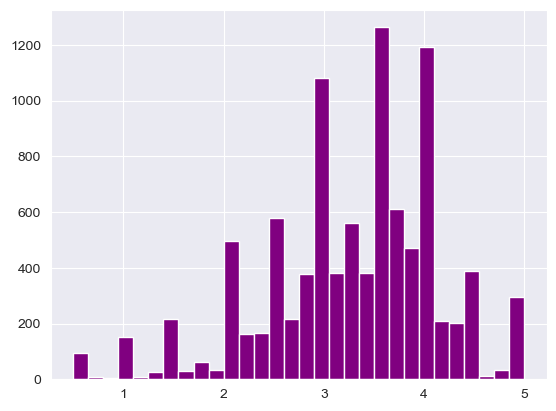

In [20]:
merged_rating_mean_count["rating_mean"].hist(bins=30, color='purple')

<Axes: >

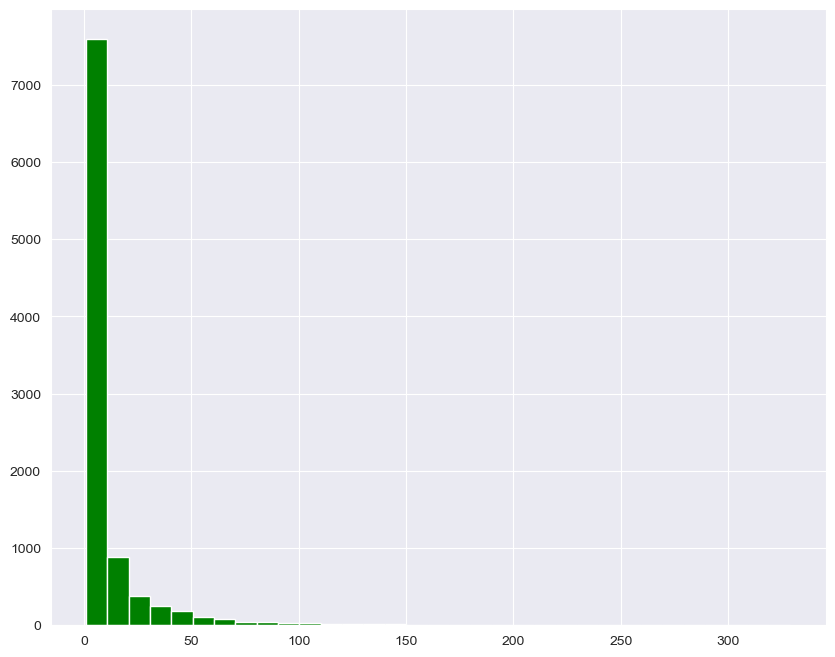

In [21]:
plt.figure(figsize=(10,8))
sns.set_style("darkgrid")
merged_rating_mean_count['rating_count'].hist(bins=33, color="green")

<Axes: xlabel='rating_mean', ylabel='rating_count'>

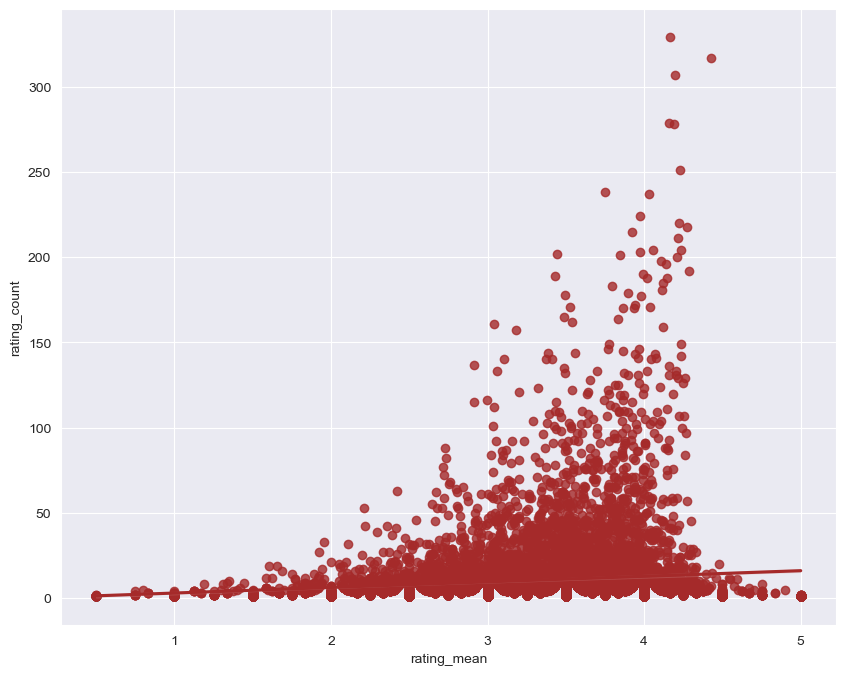

In [22]:
plt.figure(figsize=(10,8))
sns.set_style("darkgrid")
sns.regplot(x="rating_mean",y="rating_count", data=merged_rating_mean_count,color="brown")

In [23]:
merged_rating_mean_count.sort_values("rating_count",ascending=False).head()

,rating_mean,rating_count
title,,
Forrest Gump (1994),4.164134,329
"Shawshank Redemption, The (1994)",4.429022,317
Pulp Fiction (1994),4.197068,307
"Silence of the Lambs, The (1991)",4.161290,279
"Matrix, The (1999)",4.192446,278


In [24]:
user_movie_rating_matrix=merged_movie_df.pivot_table(index="userId",columns="title",values="rating")

In [25]:
user_movie_rating_matrix

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
607,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
608,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,4.5,3.5,NaN,NaN,NaN


In [26]:
user_movie_rating_matrix.shape

(610, 9719)